<a href="https://colab.research.google.com/github/spangudw/fake-real-news-dataset/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd.read_csv('https://raw.githubusercontent.com/spangudw/fake-real-news-dataset/main/Fake.csv')

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [6]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

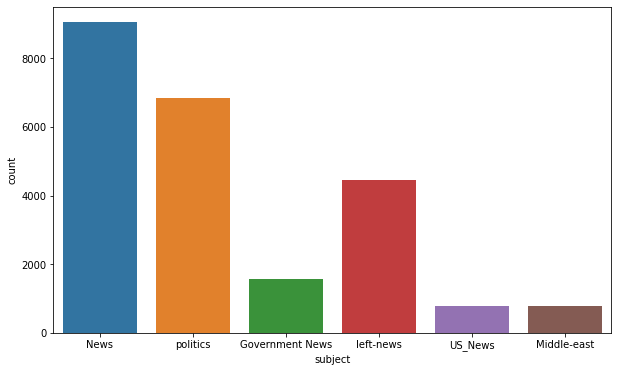

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'subject',data=fake)

## Worldcloud

In [8]:
text = ' '.join(fake['text'].tolist())

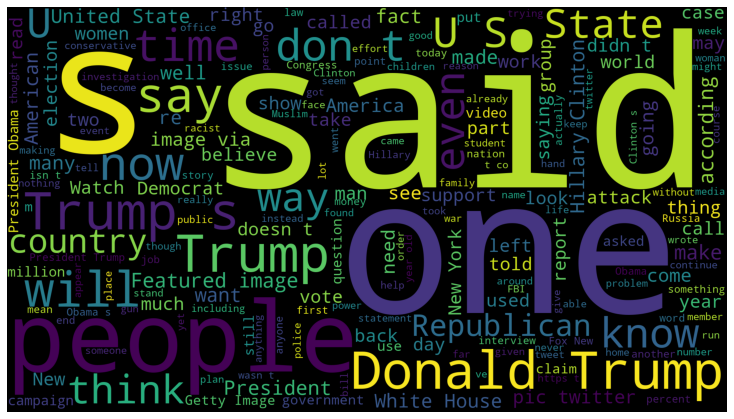

In [9]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Exploring Real news

In [10]:
real = pd.read_csv('https://raw.githubusercontent.com/spangudw/fake-real-news-dataset/main/True.csv')

In [11]:
text = ' '.join(real['text'].tolist())

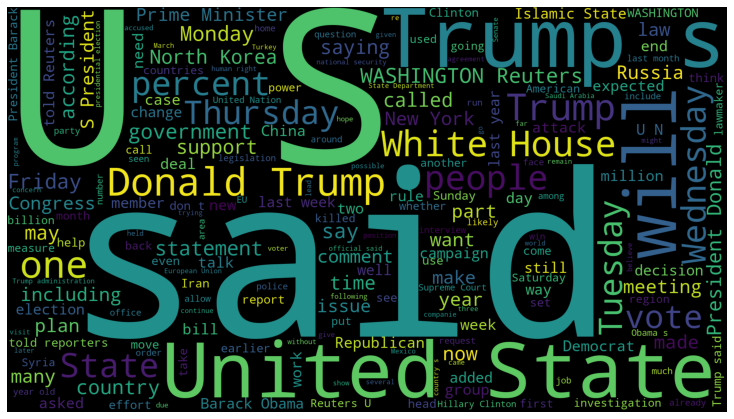

In [12]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:
real.sample(5)

,title,text,subject,date
12665,"Nobel peace laureate group tells U.S., North K...",OSLO (Reuters) - A survivor of the Hiroshima a...,worldnews,"December 9, 2017"
15074,Trump says U.S. deal with Russia on Syria will...,HANOI (Reuters) - U.S. President Donald Trump ...,worldnews,"November 11, 2017"
19040,"Philippine presidential guard shot dead, Duter...",MANILA (Reuters) - A member of Philippine Pres...,worldnews,"September 26, 2017"
7811,"Obama eases restrictions on Cuba, lifts limits...",WASHINGTON/HAVANA (Reuters) - Americans travel...,politicsNews,"October 14, 2016"
394,"Lower taxes, big gains: The stocks poised to w...",NEW YORK (Reuters) - A proposal driven by Pres...,politicsNews,"December 1, 2017"


In [14]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [15]:
len(unknown_publishers)

222

In [16]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [17]:
real = real.drop(8970, axis=0)

In [18]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')

  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [19]:
real['publisher']=publisher
real['text'] = tmp_text

In [20]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [21]:
real.shape

(21416, 5)

In [22]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [23]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [24]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [25]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

## Preprocessing Text

In [26]:
real['class'] = 1
fake['class'] = 0

In [27]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [28]:
real = real[['text', 'class']]

In [29]:
fake = fake[['text', 'class']]

In [30]:
data = real.append(fake, ignore_index=True)

In [31]:
data.sample(5)

,text,class
22469,oops: trump’s ‘voter fraud’ panel backfires o...,0
20565,mexico's strongest quake in 85 years kills doz...,1
23040,sean hannity just openly threatened someone o...,0
18259,france offers to mediate between baghdad and k...,1
2035,trump says debt ceiling 'mess' could have been...,1


In [32]:
def remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

Remove all special characters.

In [33]:
data['text'] = data['text'].apply(lambda x: remove_special_chars(x))

In [34]:
import gensim

In [35]:
y = data['class'].values

"""## Create list of list. (list of each word in news. list of news.)"""

In [36]:
X = [d.split() for d in data['text'].tolist()]

"""Word to Vector conversion.
*   Word2Vec : Class
*   Sentences : list
*   size : size of vector for each word
*   window :
*min_count : If there is single word in list, it will create vector for it.

"""

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

In [ ]:
t = Tokenizer()
t.fit_on_texts(X)

In [ ]:
X = t.texts_to_sequences(X)

In [ ]:
X_array = np.array([len(x) for x in X])
len(X_array[X_array>1000])

In [ ]:
max_words_in_news = 1000
X = pad_sequences(X, maxlen=max_words_in_news)

## increasing index by 1, for all others words apart from token_vocab.

In [ ]:
vocab = t.word_index
vocab_size = len(vocab) + 1

In [ ]:
len(vocab)

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=max_words_in_news, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)
accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
x = ['this is a news']
x = t.texts_to_sequences(x)
x= pad_sequences(x, maxlen=max_words_in_news)

In [ ]:
x = ['Nagaland on Sunday reported four fresh COVID-19 cases, three more than the previous day, with the tally increasing to 35,870']
x = t.texts_to_sequences(x)
x= pad_sequences(x, maxlen=max_words_in_news)
(model.predict(x) >= 0.5).astype(int)